In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [0]:
(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

In [10]:
print("X_train shape{}".format(X_train.shape))
print("y_train shape{}".format(y_train.shape))
print("X_test shape{}".format(X_test.shape))
print("y_test shape{}".format(y_test.shape))

X_train shape(60000, 28, 28)
y_train shape(60000,)
X_test shape(10000, 28, 28)
y_test shape(10000,)


In [0]:
# creating validation set
X_valid , X_train = X_train[:5000]/255.0 , X_train[5000:]/255.0
y_valid , y_train  = y_train[:5000] , y_train[5000:]

In [0]:
column_name = ["Tshirt/top" , "trouser" , "pullover" , "Dress" , "coat" , "sandal" , "shirt" , "sneaker" , "bag" , "ankleboot"]

In [22]:
column_name[y_train[0]]

'coat'

In [43]:
# model building
model = Sequential([ Flatten(input_shape = [28,28]),
                     Dense (120 , activation='relu'),
                     Dense(60 , activation='tanh'),
                     Dense(30 , activation='relu'),
                     Dense(10 , activation="softmax")])


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 120)               94200     
_________________________________________________________________
dense_24 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_25 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                310       
Total params: 103,600
Trainable params: 103,600
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
model.compile(optimizer="adam" , loss = "sparse_categorical_crossentropy" , metrics = ['accuracy'])

In [50]:
history=model.fit(X_train , y_train , validation_data=(X_valid , y_valid) , epochs=30 , batch_size=32)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.0771 - acc: 0.9714 - val_loss: 0.5336 - val_acc: 0.8916
Epoch 2/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.0795 - acc: 0.9706 - val_loss: 0.5285 - val_acc: 0.8876
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.0775 - acc: 0.9713 - val_loss: 0.5218 - val_acc: 0.8928
Epoch 4/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.0787 - acc: 0.9715 - val_loss: 0.5051 - val_acc: 0.8980
Epoch 5/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.0824 - acc: 0.9699 - val_loss: 0.4998 - val_acc: 0.8956
Epoch 6/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.0797 - acc: 0.9708 - val_loss: 0.5309 - val_acc: 0.8884
Epoch 7/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.0758 - acc: 0.9715 - val_loss: 0.5

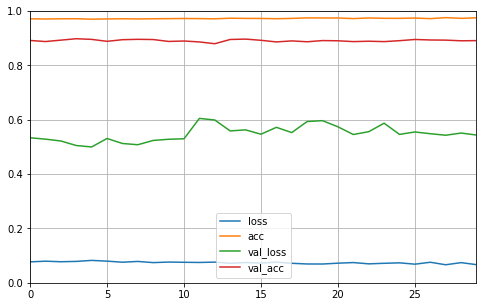

In [59]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
model.evaluate(x_test , y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.6988 - acc: 0.8519


[0.6988147496744991, 0.8519]

In [0]:
y_pred = model.predict_classes(X_test)

In [74]:
for i in range(20):
  print(column_name[y_pred[i]] , "\t", column_name[y_test[i]])

ankleboot 	 ankleboot
pullover 	 pullover
trouser 	 trouser
trouser 	 trouser
shirt 	 shirt
trouser 	 trouser
coat 	 coat
coat 	 shirt
sandal 	 sandal
sneaker 	 sneaker
coat 	 coat
sandal 	 sandal
sandal 	 sneaker
Dress 	 Dress
coat 	 coat
trouser 	 trouser
pullover 	 pullover
pullover 	 coat
bag 	 bag
Tshirt/top 	 Tshirt/top
